# Fraud Detection Using Machine Learning

This notebook demonstrates fraud detection using machine learning classification techniques on transaction data.

## 1. Import Required Libraries
Import libraries such as pandas, numpy, scikit-learn, matplotlib, and seaborn.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

## 2. Load and Explore Dataset
Load a fraud detection dataset (e.g., credit card transactions) and perform exploratory data analysis including summary statistics and class distribution.

       Amount  Time Location TransactionType  Fraud
0  239.367939    16    Urban             ATM      0
1  149.446473     2    Rural             POS      0
2  138.228358     7    Urban             ATM      0
3  138.230229    13    Rural             ATM      0
4  464.971441     2    Urban          Online      0
            Amount         Time        Fraud
count  1000.000000  1000.000000  1000.000000
mean    205.993027    11.656000     0.050000
std     140.285710     6.905603     0.218054
min       4.591898     0.000000     0.000000
25%     102.621133     6.000000     0.000000
50%     172.906400    12.000000     0.000000
75%     274.215768    18.000000     0.000000
max     778.689043    23.000000     1.000000
Class distribution:
Fraud
0    950
1     50
Name: count, dtype: int64


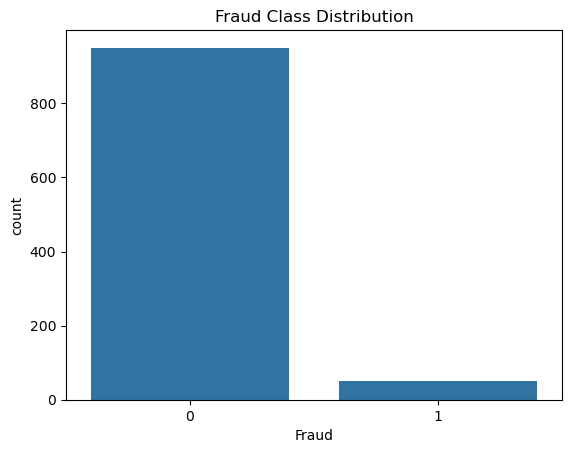

In [2]:
# Load sample fraud detection dataset
# For demonstration, generate synthetic data
np.random.seed(42)
n_samples = 1000
amount = np.random.gamma(shape=2, scale=100, size=n_samples)
time = np.random.randint(0, 24, size=n_samples)
location = np.random.choice(['Urban', 'Suburban', 'Rural'], size=n_samples)
transaction_type = np.random.choice(['Online', 'POS', 'ATM'], size=n_samples)
fraud = np.random.binomial(1, p=0.05, size=n_samples)

# Create DataFrame
df = pd.DataFrame({
    'Amount': amount,
    'Time': time,
    'Location': location,
    'TransactionType': transaction_type,
    'Fraud': fraud
})

# Explore dataset
print(df.head())
print(df.describe())
print('Class distribution:')
print(df['Fraud'].value_counts())
sns.countplot(x='Fraud', data=df)
plt.title('Fraud Class Distribution')
plt.show()

## 3. Preprocess Data
Handle missing values, encode categorical variables, and scale numerical features as needed.

In [4]:
# Encode categorical variables
le_location = LabelEncoder()
df['Location_enc'] = le_location.fit_transform(df['Location'])
le_type = LabelEncoder()
df['TransactionType_enc'] = le_type.fit_transform(df['TransactionType'])

# Scale numerical features
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])

# Prepare feature set
features = ['Amount_scaled', 'Time_scaled', 'Location_enc', 'TransactionType_enc']
X = df[features]
y = df['Fraud']
display(df)

,Amount,Time,Location,TransactionType,Fraud,Location_enc,TransactionType_enc,Amount_scaled,Time_scaled
0,239.367939,16,Urban,ATM,0,2,0,0.238026,0.629369
1,149.446473,2,Rural,POS,0,0,2,-0.403283,-1.398985
2,138.228358,7,Urban,ATM,0,2,0,-0.483289,-0.674572
3,138.230229,13,Rural,ATM,0,0,0,-0.483276,0.194722
4,464.971441,2,Urban,Online,0,2,1,1.847002,-1.398985
...,...,...,...,...,...,...,...,...,...
995,495.242135,14,Rural,ATM,0,0,0,2.062889,0.339604
996,88.015325,20,Suburban,POS,0,1,2,-0.841402,1.208899
997,47.735812,4,Urban,POS,0,2,2,-1.128671,-1.109220
998,117.160347,5,Suburban,Online,0,1,1,-0.633544,-0.964337


## 4. Feature Engineering
Create new features or select relevant features to improve model performance.

In [5]:
# Example: Create a feature for high-value transactions
X['HighValue'] = (df['Amount'] > 200).astype(int)

# Example: Create a feature for night-time transactions
X['NightTime'] = ((df['Time'] >= 22) | (df['Time'] <= 6)).astype(int)

print(X.head())

   Amount_scaled  Time_scaled  Location_enc  TransactionType_enc  HighValue  \
0       0.238026     0.629369             2                    0          1   
1      -0.403283    -1.398985             0                    2          0   
2      -0.483289    -0.674572             2                    0          0   
3      -0.483276     0.194722             0                    0          0   
4       1.847002    -1.398985             2                    1          1   

   NightTime  
0          0  
1          1  
2          0  
3          0  
4          1  


C:\Users\pravi\AppData\Local\Temp\ipykernel_21940\3552543032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HighValue'] = (df['Amount'] > 200).astype(int)
C:\Users\pravi\AppData\Local\Temp\ipykernel_21940\3552543032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['NightTime'] = ((df['Time'] >= 22) | (df['Time'] <= 6)).astype(int)


## 5. Split Data into Train and Test Sets
Use train_test_split from scikit-learn to divide the data into training and testing sets.

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (700, 6)
Test shape: (300, 6)


## 6. Train Classification Model
Train a classification model (e.g., Random Forest) to detect fraudulent transactions.

In [7]:
# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

## 7. Evaluate Model Performance
Assess the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [8]:
# Evaluate model performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

Accuracy: 0.950
Precision: 0.000
Recall: 0.000
F1-score: 0.000
ROC-AUC: 0.574


c:\Users\pravi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 8. Visualize Results
Plot confusion matrix, ROC curve, and feature importances to interpret the model.

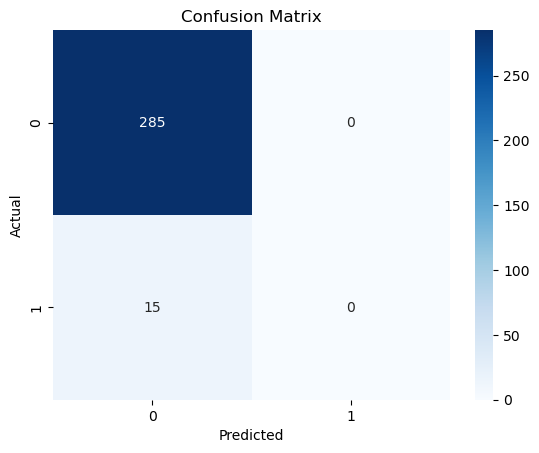

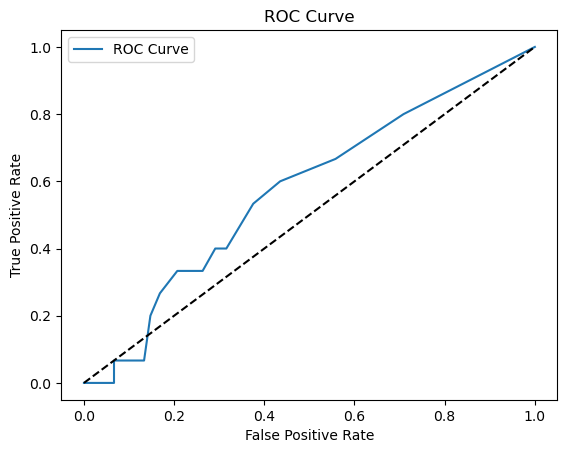

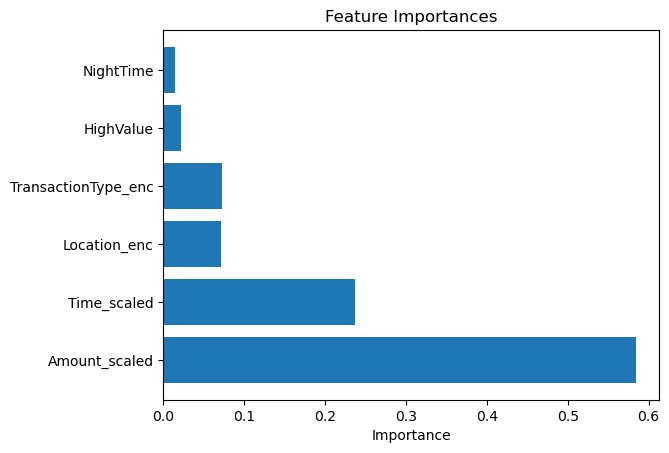

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature importances
importances = clf.feature_importances_
feat_names = X.columns
plt.barh(feat_names, importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()

## 9. Save Predictions to CSV
Save the predicted labels and probabilities for the test set to a CSV file.

In [10]:
# Save predictions to CSV
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability_Fraud': y_proba
})
results_df.to_csv('fraud_detection_predictions.csv', index=False)
print(results_df.head())
print("Saved as fraud_detection_predictions.csv")

     Actual  Predicted  Probability_Fraud
500       0          0               0.01
643       0          0               0.09
340       0          0               0.08
484       0          0               0.03
940       0          0               0.00
Saved as fraud_detection_predictions.csv


## 10. Build a Fraud Detection Pipeline
Create a pipeline to preprocess, engineer features, train, and predict on new test data.

In [14]:
# ...existing code above...

# Example: Predict on 10 new test data points
new_data = pd.DataFrame({
    'Amount': [150, 350, 80, 500, 220, 75, 300, 180, 410, 60],
    'Time': [14, 2, 23, 8, 19, 5, 21, 0, 16, 12],
    'Location': ['Urban', 'Rural', 'Suburban', 'Urban', 'Rural', 'Suburban', 'Urban', 'Rural', 'Suburban', 'Urban'],
    'TransactionType': ['Online', 'ATM', 'POS', 'Online', 'ATM', 'POS', 'Online', 'ATM', 'POS', 'Online']
})
predictions = pipeline.predict(new_data)
probas = pipeline.predict_proba(new_data)[:, 1]
print('Predictions:', predictions)
print('Probabilities:', probas)

Predictions: [0 0 0 0 0 0 0 0 0 0]
Probabilities: [0.01 0.   0.   0.   0.   0.   0.   0.   0.01 0.  ]
